## baseline

In [51]:
import pickle
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

In [103]:
experiment_path='/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_1-screw'

with open(experiment_path + "/all_trainscores.pkl", "rb") as file:
    guide_trainscores = pickle.load(file)
with open(experiment_path + "/all_testscores.pkl", "rb") as file:
    guide_testscores = pickle.load(file)
with open(experiment_path + "/experiment_paths.json", 'r') as file:
    exppath_guide = json.load(file)   

guide_arange=np.arange(len(guide_trainscores)+2*len(guide_testscores))
guide_allpaths=exppath_guide['train']+ exppath_guide['test']+ exppath_guide['test']
guide_allscores=guide_trainscores.tolist()+[-1]*len(guide_testscores)+ guide_testscores.tolist()

anotype_marker={'good':'.','scratch':'_','manipulated_front':'x','scratch_head':'^','scratch_neck':'s','thread_side':'p','thread_top':'D'}
anocolor={'good':'deepskyblue','scratch':'red','manipulated_front':'green','scratch_head':'magenta','scratch_neck':'cyan','thread_side':'purple','thread_top':'olive'}
anocolor_clean={'good':'skyblue','scratch':'lightoral','manipulated_front':'lightgreen','scratch_head':'orchid','scratch_neck':'aquamarine','thread_side':'mediumpurple','thread_top':'lime'}



anotype=['good']*len(guide_allscores)
for key in anotype_marker.keys():
    anotype=[key if key in path else anotype[i] for i,path in enumerate(guide_allpaths)]
color=[anocolor[key] for key in anotype]
color_clean=[anocolor_clean[key] for key in anotype]

marker=[anotype_marker[key] for key in anotype]  
df=pd.DataFrame({'guide_paths':guide_allpaths,"markers":marker,'anocolor':color,'anocolor_clean':color_clean,'clean_1':guide_allscores})


/tmp/ipykernel_3303733/2825230148.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot(df.index[i], df['clean_1'][i], 'o', color='black', marker=df['markers'][i])


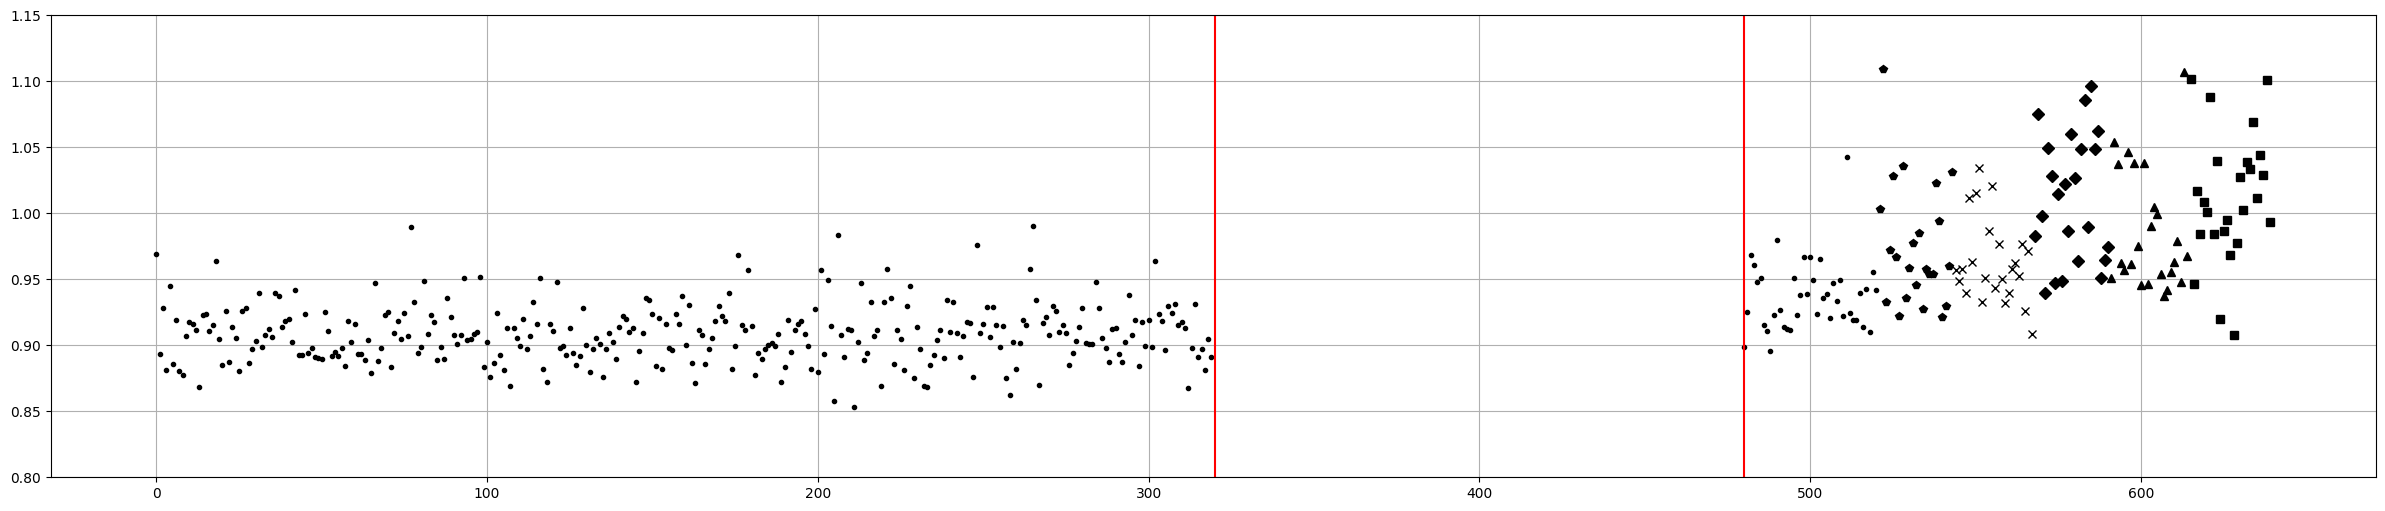

In [95]:
plt.figure(figsize=(30, 6))
for i in range(len(df)):
    plt.plot(df.index[i], df['clean_1'][i], 'o', color='black', marker=df['markers'][i])

plt.ylim(0.8,1.15)
plt.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
plt.vlines(len(guide_trainscores)+len(guide_testscores), 0.8, 1.15, color='red')
plt.grid(True)


#### clean full

In [104]:
filepaths=['/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_2-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_3-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_4-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_0/Exp_30_05_24_run_5-screw']


for i,path in enumerate(filepaths):
    with open(path + "/all_trainscores.pkl", "rb") as file:
        trainscores = pickle.load(file).tolist()
    with open(path + "/all_testscores.pkl", "rb") as file:
        testscores = pickle.load(file).tolist()
    with open(path + "/experiment_paths.json", 'r') as file:
        exppath = json.load(file)  
    
    sorted_train_idx=[exppath_guide['train'].index(path) for path in exppath['train']]
    sorted_test_idx=[exppath_guide['test'].index(path) for path in exppath['test']]
    sorted_trainscores=[trainscores[i] for i in sorted_train_idx]
    sorted_testscores=[testscores[i] for i in sorted_test_idx]

    allscores=sorted_trainscores+[-1]*len(sorted_testscores)+ sorted_testscores
    df[f'clean_{i+2}']=allscores

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   guide_paths     640 non-null    object 
 1   markers         640 non-null    object 
 2   anocolor        640 non-null    object 
 3   anocolor_clean  640 non-null    object 
 4   clean_1         640 non-null    float64
 5   clean_2         640 non-null    float64
 6   clean_3         640 non-null    float64
 7   clean_4         640 non-null    float64
 8   clean_5         640 non-null    float64
dtypes: float64(5), object(4)
memory usage: 45.1+ KB


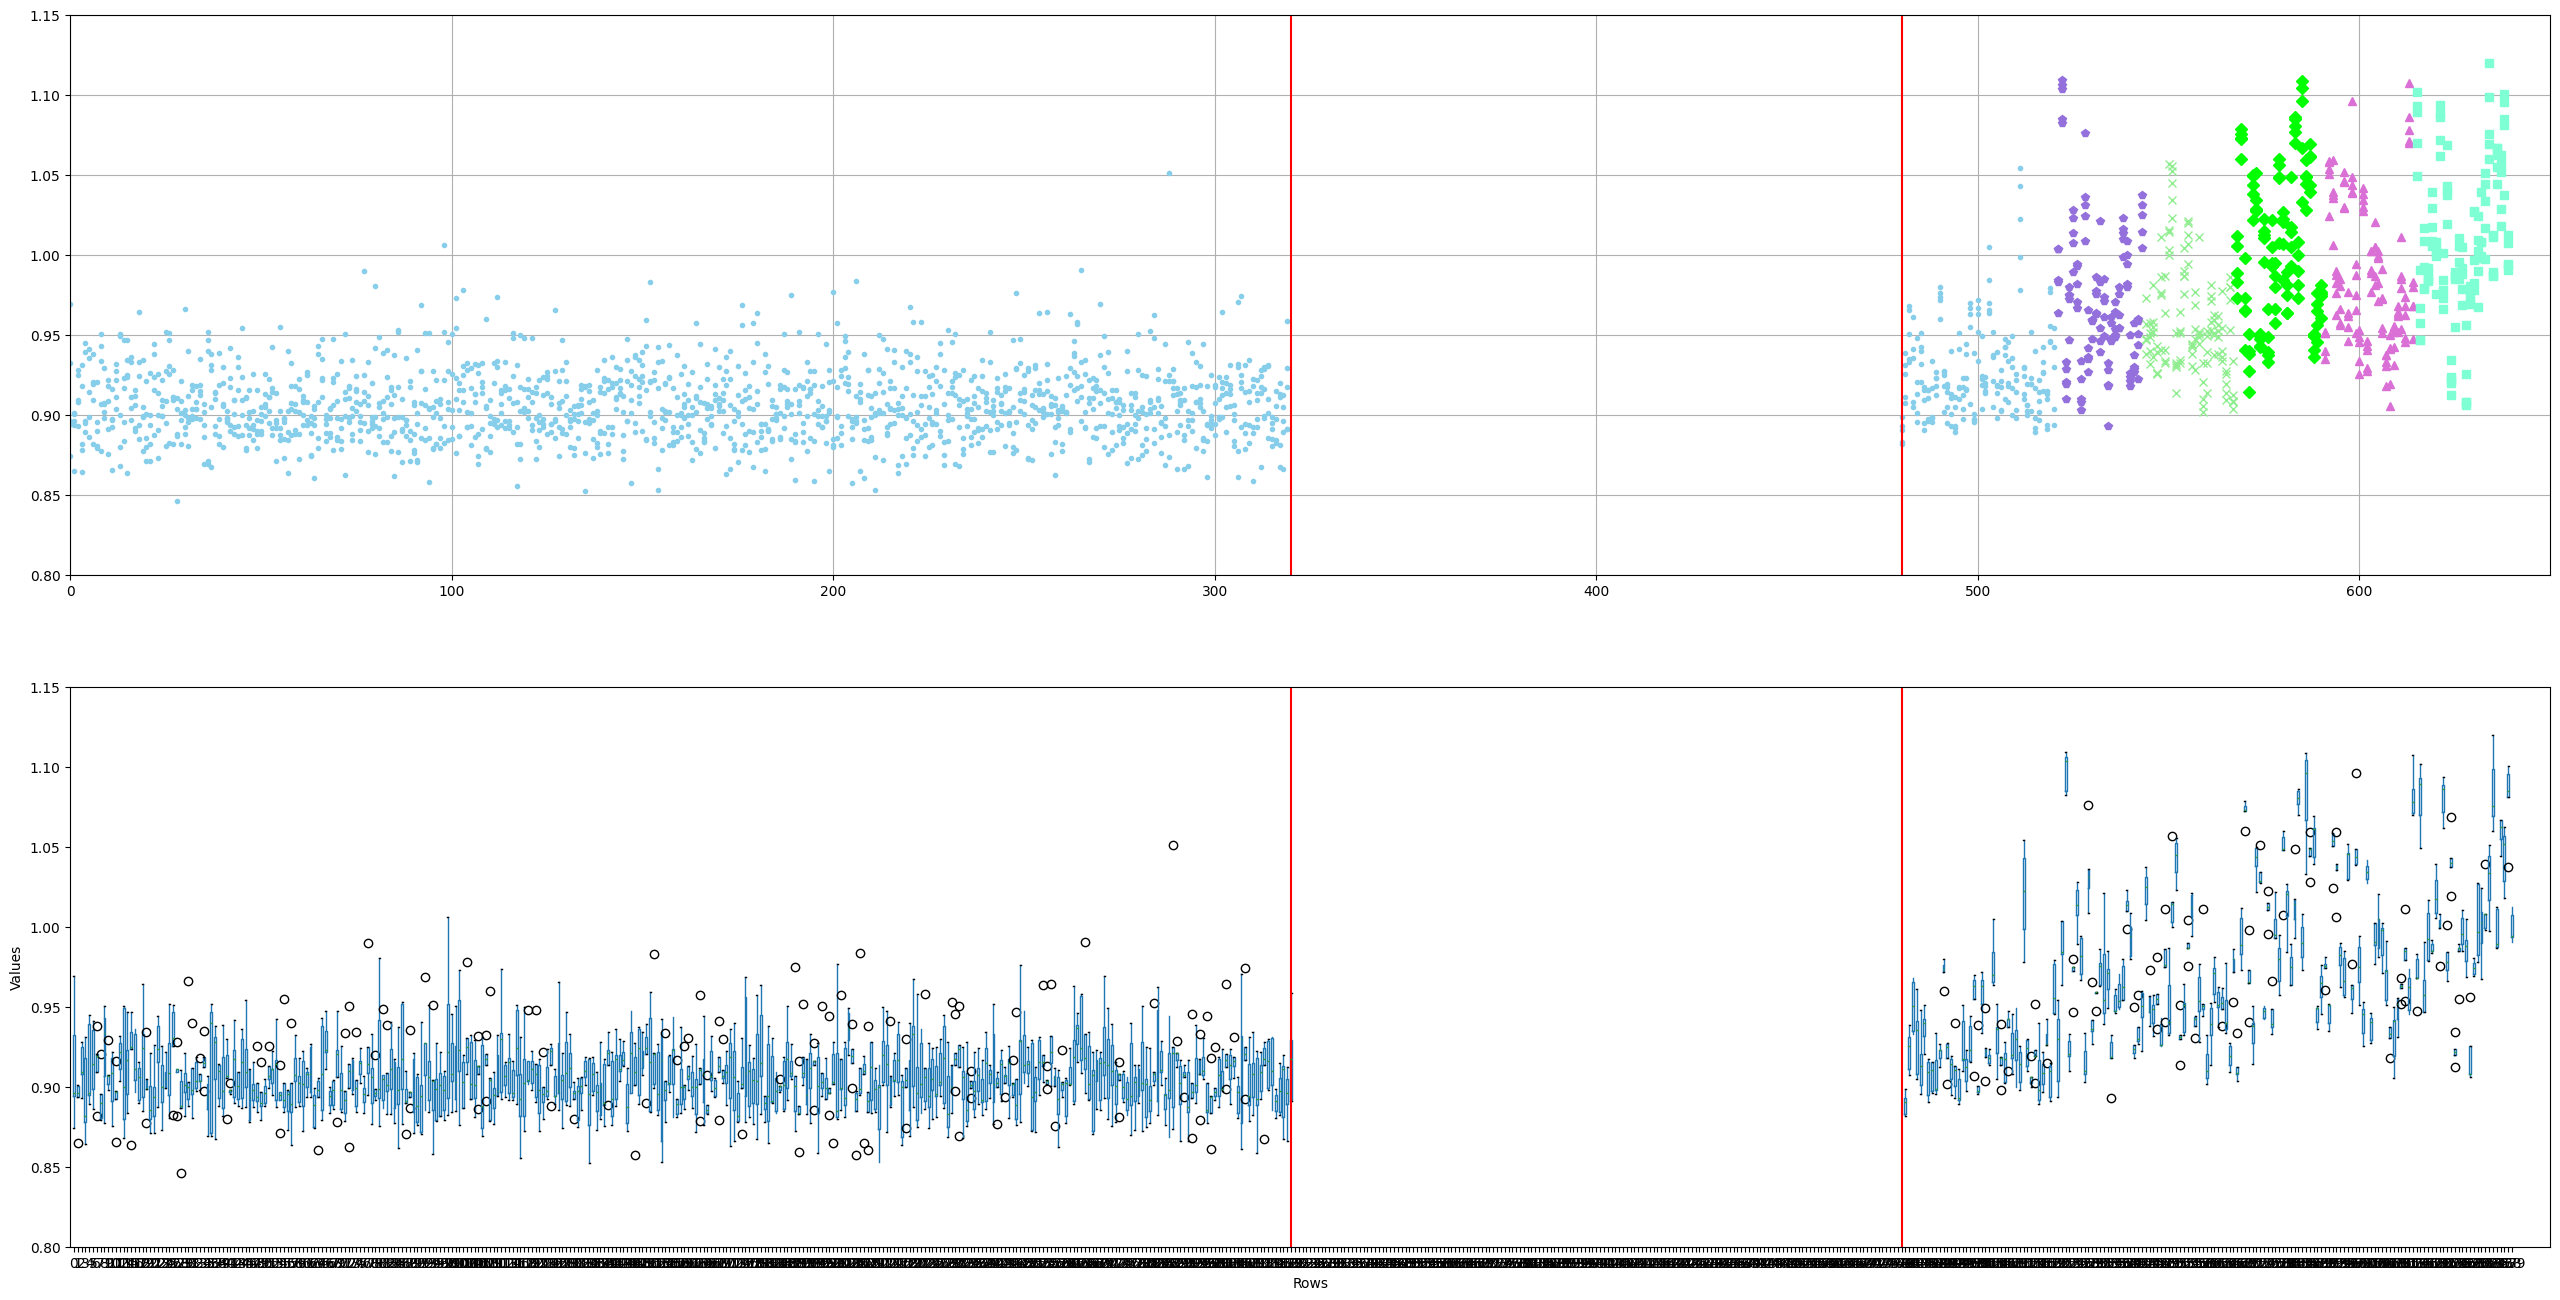

In [106]:
# Creating subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(32, 16))

# First subplot: Plotting data points
for i in range(len(df)):
    ax1.plot(df.index[i], df['clean_1'][i],   marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_2'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_3'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_4'][i],  marker=df['markers'][i],color=df['anocolor_clean'][i])
    ax1.plot(df.index[i], df['clean_5'][i], marker=df['markers'][i],color=df['anocolor_clean'][i])

ax1.set_ylim(0.8, 1.15)
ax1.set_xlim(0, 650)
ax1.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
ax1.vlines(len(guide_trainscores) + len(guide_testscores), 0.8, 1.15, color='red')
ax1.grid(True)

df_transposed = df[['clean_1', 'clean_2', 'clean_3', 'clean_4', 'clean_5']].T
df_transposed.boxplot(ax=ax2)
ax2.set_ylim(0.8, 1.15)
ax2.set_xlim(0, 650)
ax2.vlines(len(guide_trainscores), 0.8, 1.15, color='red')
ax2.vlines(len(guide_trainscores) + len(guide_testscores), 0.8, 1.15, color='red')
ax2.set_xlabel('Rows')
ax2.set_ylabel('Values')
ax2.grid(False)

plt.show()

In [109]:
filepaths=['/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_2-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_3-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_4-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_5-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_6-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_7-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_8-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_9-screw',
           '/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_30_05_24_run_10-screw']


for i,path in enumerate(filepaths):
    
    print(path)
    with open(path + "/all_trainscores.pkl", "rb") as file:
        trainscores = pickle.load(file).tolist()
        
    with open(path + "/all_testscores.pkl", "rb") as file:
        testscores = pickle.load(file).tolist()
        
    with open(path + "/all_trainscores_clean.pkl", "rb") as file:
        trainscores_clean = pickle.load(file).tolist()
    
    with open(path + "/all_testscores_clean.pkl", "rb") as file:
        testscores_clean = pickle.load(file).tolist()
        
    with open(path + "/experiment_paths.json", 'r') as file:
        exppath = json.load(file)  
    
    # clean
    sorted_train_clean_idx=[exppath_guide['train'].index(path) for path in exppath['clean_train']]
    sorted_test_clean_idx=[exppath_guide['test'].index(path) for path in exppath['test']]
        
    sorted_trainscores_clean=[trainscores_clean[i] for i in sorted_train_clean_idx]
    sorted_testscores_clean=[testscores_clean[i] for i in sorted_test_clean_idx]
    
    allscores_clean=sorted_trainscores_clean+[-1]*len(sorted_testscores_clean)+ sorted_testscores_clean
    df[f'cont_clean{i}']=allscores_clean
    
    
    

df.info()

/home/bule/projects/UTRAD/results/mvtec/contamination_10/Exp_29_05_24_run_1-screw


IndexError: list index out of range

In [111]:
len(trainscores_clean)

320